In [89]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [90]:
#conexão com o banco de dados sqlite
conexao = sqlite3.connect('database.sqlite')

#query para obter o nome de todas as tabelas do banco 
query = "SELECT name FROM sqlite_master WHERE type='table';"
tabelas = pd.read_sql_query(query, conexao)
print(tabelas)

      name
0  reviews
1  artists
2   genres
3   labels
4    years
5  content


In [91]:
#query para reviews
query = "SELECT * FROM reviews"
reviews = pd.read_sql_query(query, conexao)
reviews.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017


In [92]:
query = "SELECT * FROM genres"
genres = pd.read_sql_query(query, conexao)
genres.head(3)

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock


In [93]:
query = "SELECT * FROM labels"
labels = pd.read_sql_query(query, conexao)
labels.head(3)

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock


In [94]:
#unindo a tabela de review com a tabela de gravadoras
dados_merge = pd.merge(reviews, labels, on='reviewid')

#unindo a tabela dados_merge com a tabela de generos
dados = pd.merge(dados_merge, genres, on='reviewid')
dados.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock


In [95]:
# Fecha a conexão com o banco
conexao.close()

---

Analise dos dados antes do tratamento

In [96]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        24909 non-null  int64  
 1   title           24909 non-null  object 
 2   artist          24909 non-null  object 
 3   url             24909 non-null  object 
 4   score           24909 non-null  float64
 5   best_new_music  24909 non-null  int64  
 6   author          24909 non-null  object 
 7   author_type     19487 non-null  object 
 8   pub_date        24909 non-null  object 
 9   pub_weekday     24909 non-null  int64  
 10  pub_day         24909 non-null  int64  
 11  pub_month       24909 non-null  int64  
 12  pub_year        24909 non-null  int64  
 13  label           24869 non-null  object 
 14  genre           22356 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 2.9+ MB


In [97]:
dados.isnull().sum()

reviewid             0
title                0
artist               0
url                  0
score                0
best_new_music       0
author               0
author_type       5422
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
label               40
genre             2553
dtype: int64

In [98]:
#tabela com o percentual dos dados faltantes
percentual_faltantes = dados.isnull().mean() * 100

df_percentual_faltantes = percentual_faltantes.reset_index()
df_percentual_faltantes.columns = ['Coluna', 'Percentual Faltante']
df_percentual_faltantes['Percentual Faltante'] = df_percentual_faltantes['Percentual Faltante'].apply(lambda x: f'{x:.2f}%')

df_percentual_faltantes

,Coluna,Percentual Faltante
0,reviewid,0.00%
1,title,0.00%
2,artist,0.00%
3,url,0.00%
4,score,0.00%
5,best_new_music,0.00%
6,author,0.00%
7,author_type,21.77%
8,pub_date,0.00%
9,pub_weekday,0.00%


In [99]:
dados['best_new_music'].value_counts()

best_new_music
0    23559
1     1350
Name: count, dtype: int64

In [100]:
dados['label'].value_counts()

label
self-released      475
sub pop            337
thrill jockey      320
drag city          301
domino             284
                  ... 
casa nueva           1
c.sides              1
foreign leisure      1
thizz city           1
nice                 1
Name: count, Length: 3667, dtype: int64

- analise visual dos dados

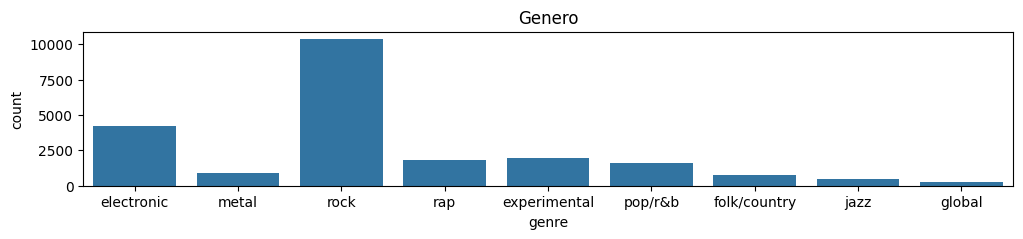

In [101]:
plt.figure(figsize=(12, 2))
sns.countplot(x=dados['genre'])
plt.title('Genero')
plt.show()

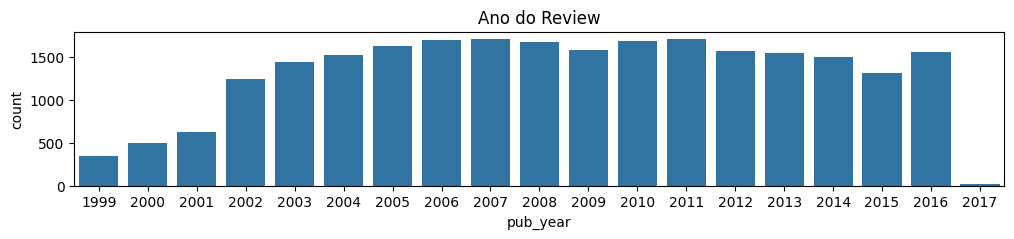

In [102]:
plt.figure(figsize=(12, 2))
sns.countplot(x=dados['pub_year'])
plt.title('Ano do Review')
plt.show()

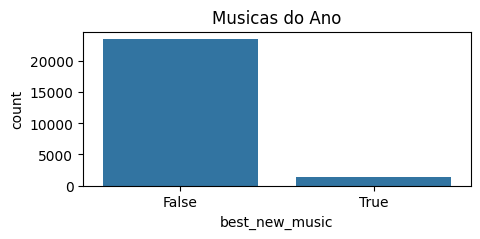

In [103]:
plt.figure(figsize=(5, 2))
sns.countplot(x=dados['best_new_music'] >= 1)
plt.title('Musicas do Ano')
plt.show()

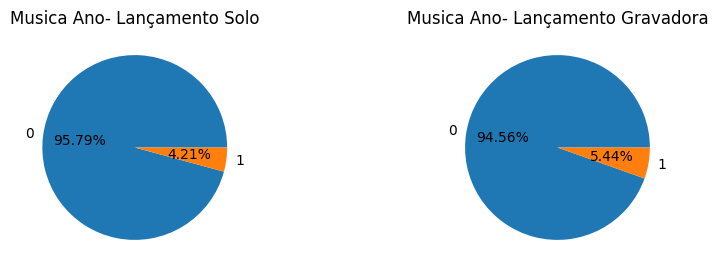

In [104]:
dados_temp = dados.copy()
solo_released = dados_temp[dados_temp['label'] == 'self-released']
gravadora = dados_temp[dados_temp['label'] != 'self-released']

self_released_best_music = solo_released['best_new_music'].value_counts(normalize=True).sort_index()
gravadora_best_music = gravadora['best_new_music'].value_counts(normalize=True).sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.pie(self_released_best_music, labels=self_released_best_music.index, autopct='%1.2f%%')
ax1.set_title('Musica Ano- Lançamento Solo')


ax2.pie(gravadora_best_music, labels=gravadora_best_music.index, autopct='%1.2f%%')
ax2.set_title('Musica Ano- Lançamento Gravadora')

plt.show()

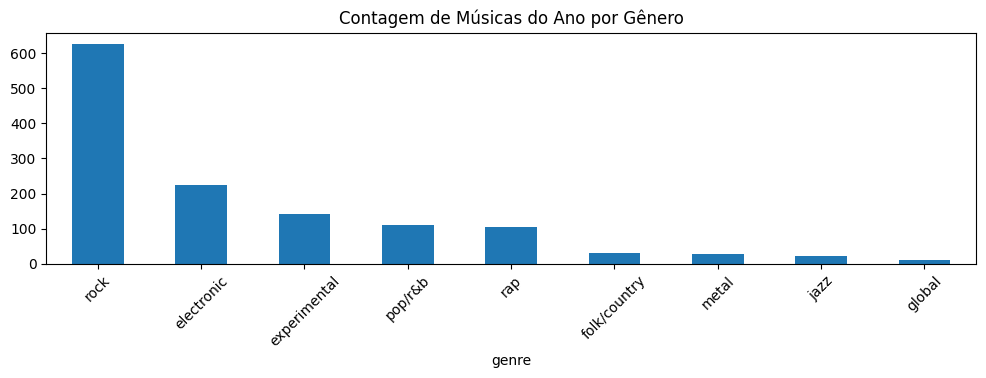

In [105]:
musica_ano = dados_temp[dados_temp['best_new_music'] ==1]
musica_ano_genero = musica_ano['genre'].value_counts()

plt.figure(figsize=(12, 3))
grafico = musica_ano_genero.plot(kind='bar')
plt.title('Contagem de Músicas do Ano por Gênero')
plt.xticks(rotation=45)  
plt.show()

---

Tratamento dos dados

- correçao dos dados faltantes

In [106]:
#dados faltantes em label substituidos por unknown
#utilizando moda seria inserido self_realesed, podendo implicar no resultados do modelo
dados['label'].fillna('Unknown', inplace=True)

C:\Users\Matheus_SilvadeLima\AppData\Local\Temp\ipykernel_20076\692972755.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [107]:
#verificando informaçoes na coluna author_type
dados['author_type'].unique()

array(['contributor', 'associate reviews editor', 'tracks coordinator',
       'associate staff writer', 'contributing editor',
       'senior staff writer', 'assistant editor', 'associate editor',
       'senior editor', 'executive editor', None, 'deputy news editor',
       'associate features editor', 'managing editor', 'editor-in-chief',
       'news director'], dtype=object)

In [108]:
#dados faltantes em genre e author_type substituidos pela moda
dados['genre'].fillna(dados['genre'].mode()[0], inplace=True)
dados['author_type'].fillna(dados['author_type'].mode()[0], inplace=True)

C:\Users\Matheus_SilvadeLima\AppData\Local\Temp\ipykernel_20076\72054365.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Matheus_SilvadeLima\AppData\Local\Temp\ipykernel_20076\72054365.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [109]:
dados.isnull().sum()

reviewid          0
title             0
artist            0
url               0
score             0
best_new_music    0
author            0
author_type       0
pub_date          0
pub_weekday       0
pub_day           0
pub_month         0
pub_year          0
label             0
genre             0
dtype: int64

- alteraçao e criaçao de colunas

In [110]:
#criando uma nova coluna chamada self_realesed, se a musica foi lançada solo/sem gravadora retorna 1
dados['self_released'] = (dados['label'] == 'self-released').astype(int)
dados.head(3)

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,self_released
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,0
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal,0
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,0


In [111]:
#removendo a coluna url pois nao tera impacto na preparacao do modelo
dados = dados.drop('url', axis=1)


In [112]:
#criando uma coluna para estabelecer um parametro 1 ou 0 para classificar a musica como excelente se for maior ou igual que 8 pontos
dados['good_music'] = dados['score'].apply(lambda x: 1 if x >= 8 else 0)
dados.head(3)

,reviewid,title,artist,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,self_released,good_music
0,22703,mezzanine,massive attack,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,0,1
1,22721,prelapsarian,krallice,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal,0,0
2,22659,all of them naturals,uranium club,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,0,0


---

Graficos apos tratamento dos dados

In [113]:
#criando uma copia do dataframe, somando o num de musicas do ano e boas para cada gravadora

dados_soma_musicas = dados.copy()
dados_soma_musicas = dados.groupby('label').agg({'best_new_music': 'sum', 'good_music': 'sum'}).reset_index()
dados_soma_musicas = dados_soma_musicas.sort_values(by='good_music', ascending=False)

dados_generos = dados.copy()
somatorio_generos = dados_generos.groupby('label')['genre'].value_counts().unstack(fill_value=0)

dados_somados = pd.merge(somatorio_generos, dados_soma_musicas, on='label')
dados_somados = dados_somados.sort_values(by='good_music', ascending=False)



dados_soma_musicas.head(3)

,label,best_new_music,good_music
923,domino,45,90
3097,sub pop,36,87
2002,matador,26,85


In [114]:
#criando uma copia do dataframe, somando o num de generos por gravadora

dados_generos = dados.copy()
somatorio_generos = dados_generos.groupby('label')['genre'].value_counts().unstack(fill_value=0)

somatorio_generos.head(3)

genre,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
label,,,,,,,,,
,3,0,0,0,1,1,2,0,5
deux,0,0,0,0,0,0,0,0,1
!k7,46,1,1,0,6,0,9,4,18


In [115]:
dados_somados = pd.merge(somatorio_generos, dados_soma_musicas, on='label')
dados_somados = dados_somados.sort_values(by='good_music', ascending=False)
dados_somados.head(15)

,label,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock,best_new_music,good_music
923,domino,77,25,7,0,2,0,23,1,149,45,90
3097,sub pop,43,32,17,1,0,4,12,4,224,36,87
2002,matador,23,17,3,0,1,11,1,2,173,26,85
2038,merge,4,30,8,0,1,1,10,0,221,20,67
2176,mute,88,37,1,0,0,0,6,0,108,33,66
699,columbia,38,4,9,0,14,3,30,19,125,20,66
940,drag city,1,35,37,2,0,10,12,0,204,13,63
3505,warp,149,16,2,1,7,0,8,7,49,23,62
47,4ad,10,16,3,0,1,0,11,1,97,35,58
2832,self-released,39,18,1,1,0,6,49,204,157,20,57


In [116]:
#grafico mostrando as gravadoras com maior numero de musicas do ano
primeiras_30_linhas = dados_somados.head(30)

contagem_musicas_do_ano = primeiras_30_linhas.groupby('label')['best_new_music'].sum().reset_index()

figura = px.bar(contagem_musicas_do_ano, x='label', y='best_new_music', 
             title='Contagem de Músicas do Ano por Gravadora (30 primeiras linhas)')
figura.update_xaxes(title='Gravadora')
figura.update_yaxes(title='Contagem de Músicas do Ano')

In [117]:
#grafico mostrando as gravadoras com maior numero de musicas excelentes
primeiras_30_linhas = dados_somados.head(30)

contagem_musicas_do_ano = primeiras_30_linhas.groupby('label')['good_music'].sum().reset_index()

figura = px.bar(contagem_musicas_do_ano, x='label', y='good_music', 
             title='Contagem de Músicas Excelentes por Gravadora (30 primeiras linhas)')
figura.update_xaxes(title='Gravadora')
figura.update_yaxes(title='Contagem de Músicas Excelentes')


In [118]:
#quantidade de musicas excelentes
dados['good_music'].value_counts()

good_music
0    19667
1     5242
Name: count, dtype: int64

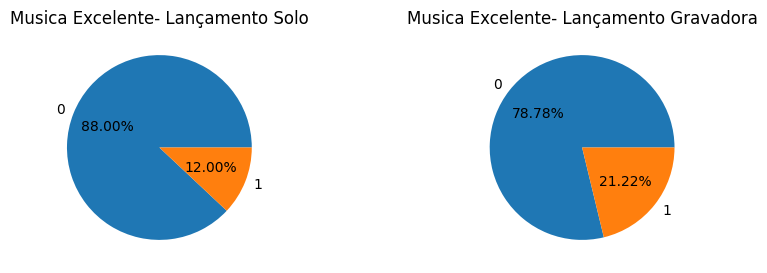

In [127]:
#grafico de musicas excelentes com percentual
dados_temp = dados.copy()
solo_released = dados_temp[dados_temp['label'] == 'self-released']
gravadora = dados_temp[dados_temp['label'] != 'self-released']

self_released_best_music = solo_released['good_music'].value_counts(normalize=True).sort_index()
gravadora_best_music = gravadora['good_music'].value_counts(normalize=True).sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.pie(self_released_best_music, labels=self_released_best_music.index, autopct='%1.2f%%')
ax1.set_title('Musica Excelente- Lançamento Solo')


ax2.pie(gravadora_best_music, labels=gravadora_best_music.index, autopct='%1.2f%%')
ax2.set_title('Musica Excelente- Lançamento Gravadora')

plt.show()

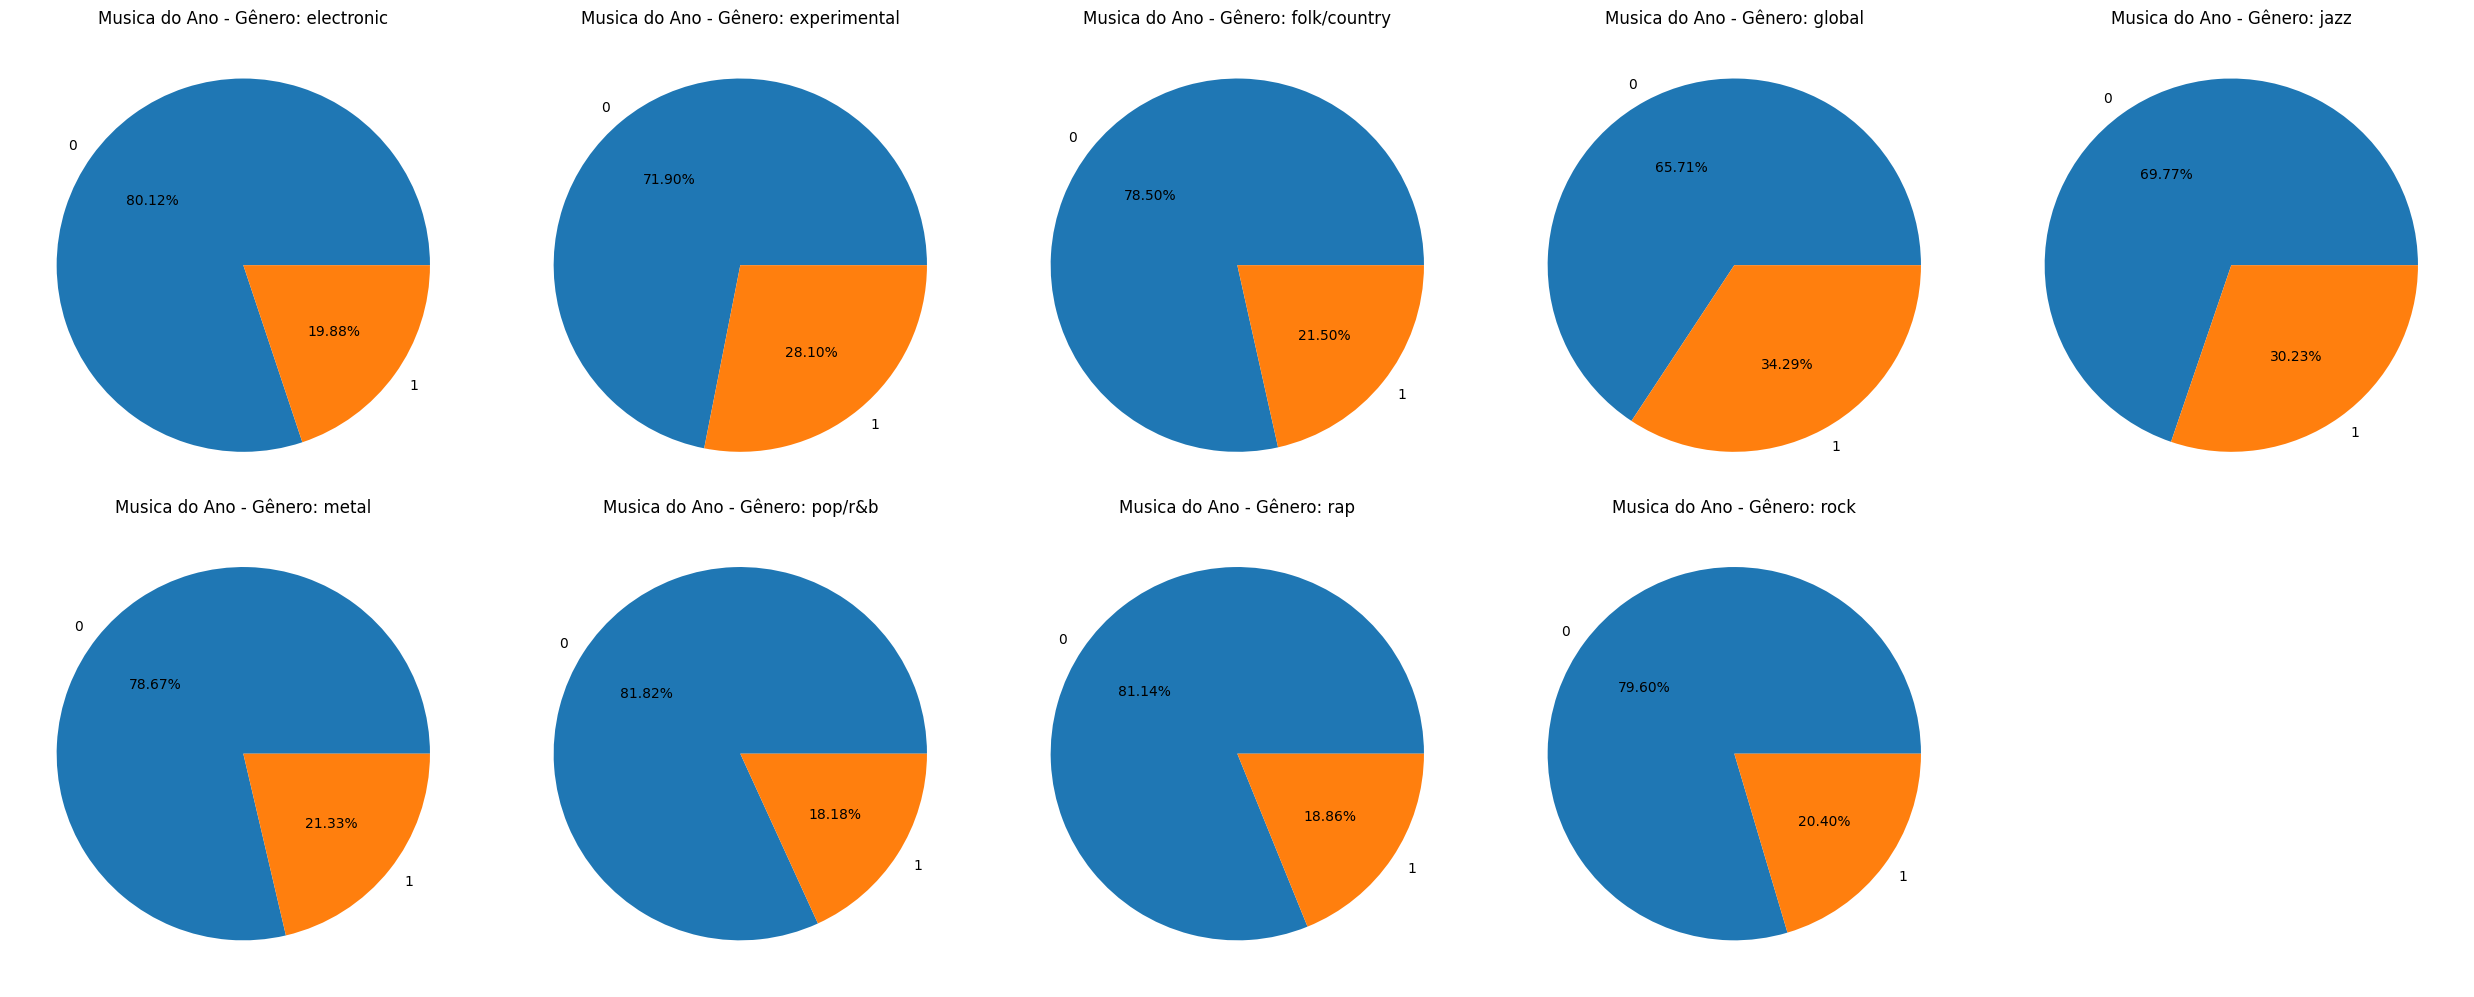

In [120]:
import matplotlib.pyplot as plt

dados_temp = dados.copy()

# Agrupar por gênero e por música do ano (0 ou 1)
genero_ano = dados_temp.groupby(['genre', 'good_music']).size().unstack(fill_value=0)

#percentual para cada gênero
genero_ano_percent = genero_ano.div(genero_ano.sum(axis=1), axis=0)

num_graficos_primeira_linha = 5
num_generos = len(genero_ano_percent)
num_linhas = (num_generos + num_graficos_primeira_linha - 1) // num_graficos_primeira_linha

fig, axes = plt.subplots(num_linhas, num_graficos_primeira_linha, figsize=(num_graficos_primeira_linha * 5, num_linhas * 5))

axes = axes.flatten()

for ax, (genero, row) in zip(axes, genero_ano_percent.iterrows()):
    ax.pie(row, labels=row.index, autopct='%1.2f%%')
    ax.set_title(f'Musica do Ano - Gênero: {genero}')

for ax in axes[num_generos:]:
    ax.remove()

plt.tight_layout()
plt.show()


In [129]:
#distribuição dos dados entre genero e musica excelente
dados_temp = dados.copy()
genero_ano = dados_temp.groupby(['genre', 'good_music']).size().reset_index(name='count')


graph = px.treemap(genero_ano, path=['genre', 'good_music'], values='count',
                   color='count', color_continuous_scale='Viridis',
                   title='Distribuição de Músicas por Gênero e Música Excelente (1 = Musica Excelente)')
graph.show()

---


Divisao do Dataset em colunas categoricas - Predicativo e Classe

- o objetivo do modelo é identificar se a musica de um genero especifico em uma gravadora poderá ser avaliada como excelente
- como classe sera utilizado o parametro se a musica é excelente (1 ou 0)
- como predicativo sera utilizado os rotulos genero e gravadora

In [122]:
# Separe as variáveis independentes (X) e a variável dependente (Y) sem usar .iloc para os indice


X_data = dados[['label', 'genre']] 
Y_data = dados['good_music']

Aplicaçao one-hot-encoder

- O ColumnTransformer aplica OneHotEncoder as colunas categoricas e mantem as outras colunas inalteradas

In [123]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# OneHotEncoder
one_hot_encoder = ColumnTransformer(transformers=[("onehot", OneHotEncoder(), ['label', 'genre'])], remainder='passthrough')

# transformaçao dos dados do onehotencoder
X_encoded = one_hot_encoder.fit_transform(X_data).toarray()
X_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [124]:
#escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled

array([[-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351, -1.03726708],
       [-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351, -1.03726708],
       [-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351,  0.96407186],
       ...,
       [-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351, -1.03726708],
       [-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351, -1.03726708],
       [-0.02195417, -0.00633622, -0.05851586, ..., -0.26400479,
        -0.28283351,  0.96407186]])

In [125]:
#divisao do dataset em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y_data, test_size=0.2, random_state=0)

In [126]:
#resultado dos datasets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(19927, 3677) (4982, 3677) (19927,) (4982,)
